# Load the data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data-employee-recruitment.csv")

In [3]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


# Analyze the data

In [4]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


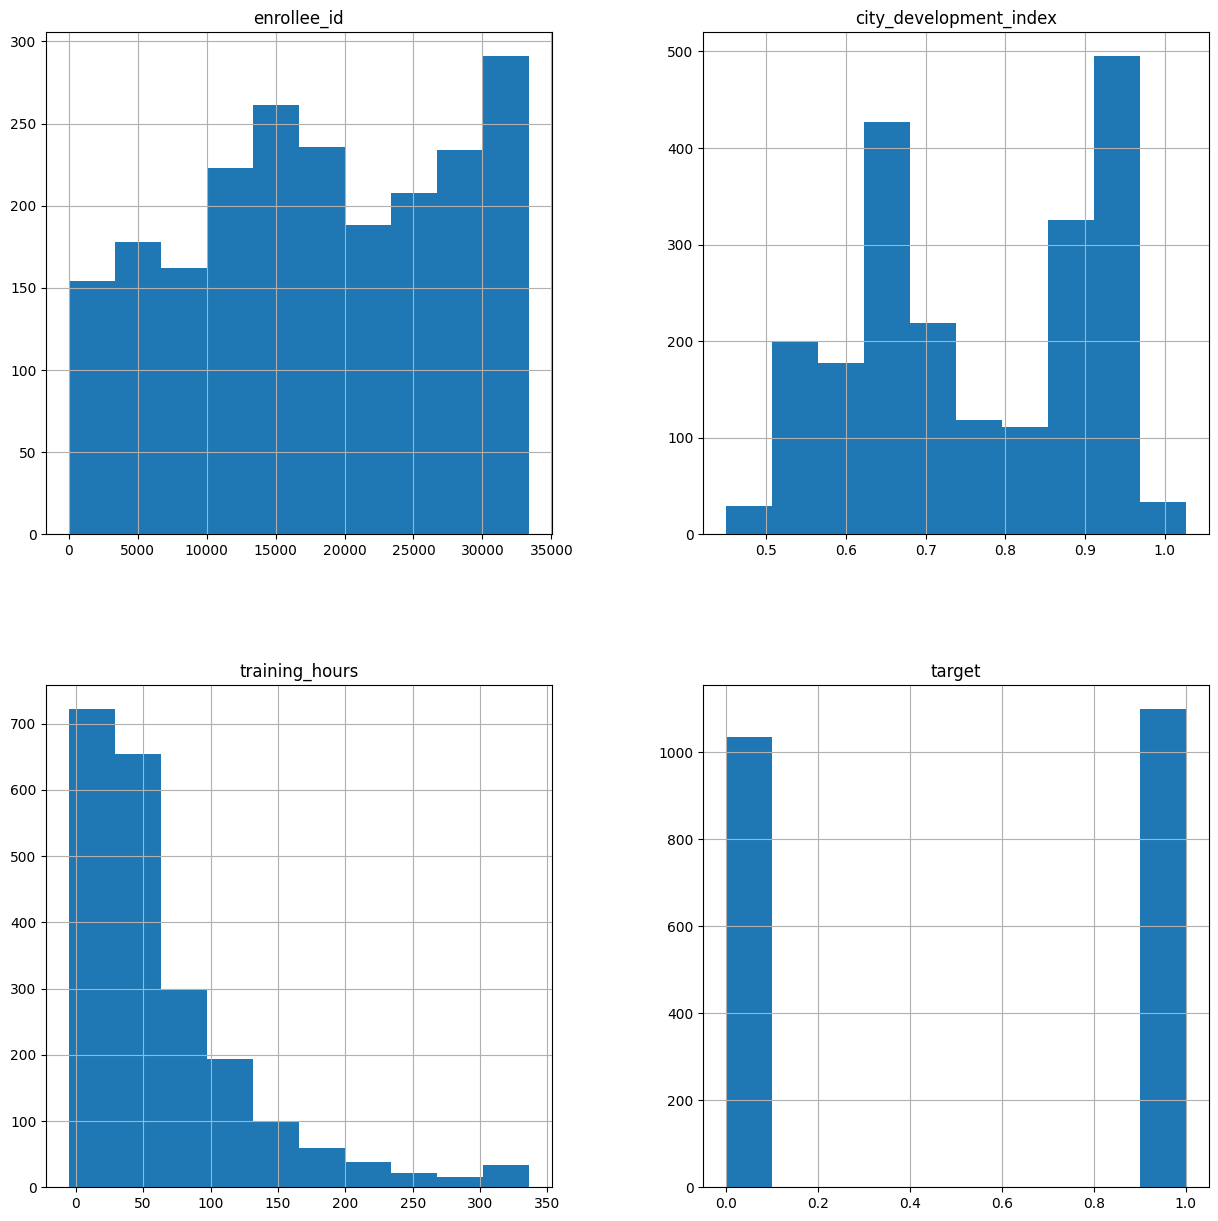

In [5]:
# Plot histograms of all data features
df.hist(figsize=(15, 15))
plt.show()

In [6]:
# Preprocess data, determine feature x and label y
feature_names = df.columns.tolist()     
feature_names.remove("target")       
feature_data = df[feature_names]         
target_data = df.target

In [7]:
# Label encode columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
feature_data['gender'] = label_encoder.fit_transform(feature_data['gender'])
feature_data['relevent_experience'] = label_encoder.fit_transform(feature_data['relevent_experience'])
feature_data['enrolled_university'] = label_encoder.fit_transform(feature_data['enrolled_university'])
feature_data['education_level'] = label_encoder.fit_transform(feature_data['education_level'])
feature_data['major_discipline'] = label_encoder.fit_transform(feature_data['major_discipline'])
feature_data['experience'] = label_encoder.fit_transform(feature_data['experience'])
feature_data['company_size'] = label_encoder.fit_transform(feature_data['company_size'])
feature_data['company_type'] = label_encoder.fit_transform(feature_data['company_type'])
feature_data['last_new_job'] = label_encoder.fit_transform(feature_data['last_new_job'])

/var/folders/d5/z9jzrbjx4bncdccptn36y0h40000gn/T/ipykernel_18107/34199730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['gender'] = label_encoder.fit_transform(feature_data['gender'])
/var/folders/d5/z9jzrbjx4bncdccptn36y0h40000gn/T/ipykernel_18107/34199730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['relevent_experience'] = label_encoder.fit_transform(feature_data['relevent_experience'])
/var/folders/d5/z9jzrbjx4bncdccptn36y0h40000gn/T/ipykernel_18107/34199730.py:6: 

# Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes

In [8]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(feature_data.values, target_data.values, random_state=1, test_size=0.2)

In [9]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1' 

Before oversampling: (1708, 12)
(array([0., 1.]), array([836, 872]))


In [10]:
# Load the SMOTE library
from imblearn.over_sampling import SMOTE     

# Initialize SMOTE
smote = SMOTE(random_state=5)                
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train) 

In [11]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1' 

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))     # Print number of labels, now label '0' and '1' have the same number of labels.

Before oversampling: (1708, 12)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 12)
(array([0., 1.]), array([872, 872]))


# Use GridSearchCV to find the best Decision Tree and Random Forest

In [12]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.tree import DecisionTreeClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [13]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [14]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8}

In [15]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [16]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(max_depth=5, min_samples_split=8)

In [17]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       199
         1.0       0.85      0.78      0.81       228

    accuracy                           0.81       427
   macro avg       0.81      0.81      0.81       427
weighted avg       0.81      0.81      0.81       427



In [18]:
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) 

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [19]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}

In [20]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [21]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=8,
                       n_estimators=10, random_state=1)

In [22]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       199
         1.0       0.87      0.85      0.86       228

    accuracy                           0.85       427
   macro avg       0.85      0.85      0.85       427
weighted avg       0.85      0.85      0.85       427



# Show the most important features

enrollee_id               0.050341
city_development_index    0.898587
gender                    0.000000
relevent_experience       0.004287
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.019942
company_size              0.009145
company_type              0.007562
last_new_job              0.000000
training_hours            0.010136
dtype: float64


<Axes: >

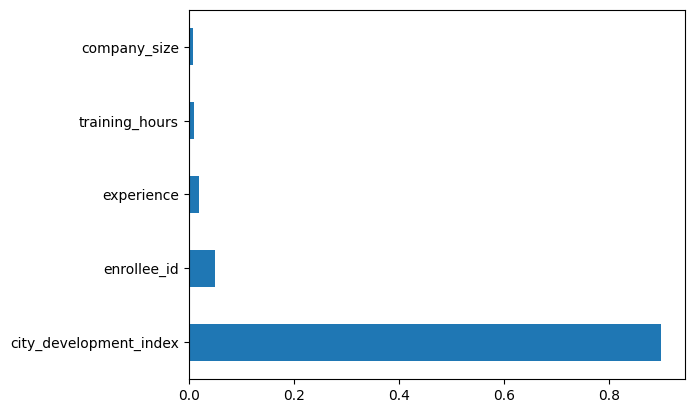

In [23]:
# Print the importance level of each feature
weights = model_dt.feature_importances_     # Feature importance scores.
cols = feature_data.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

# Plot the five most important features 
feature_importances.nlargest(5).plot(kind="barh")

# Visualize the tree

### Classification decision tree

In [24]:
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=feature_data.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['/opt/homebrew/bin/dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

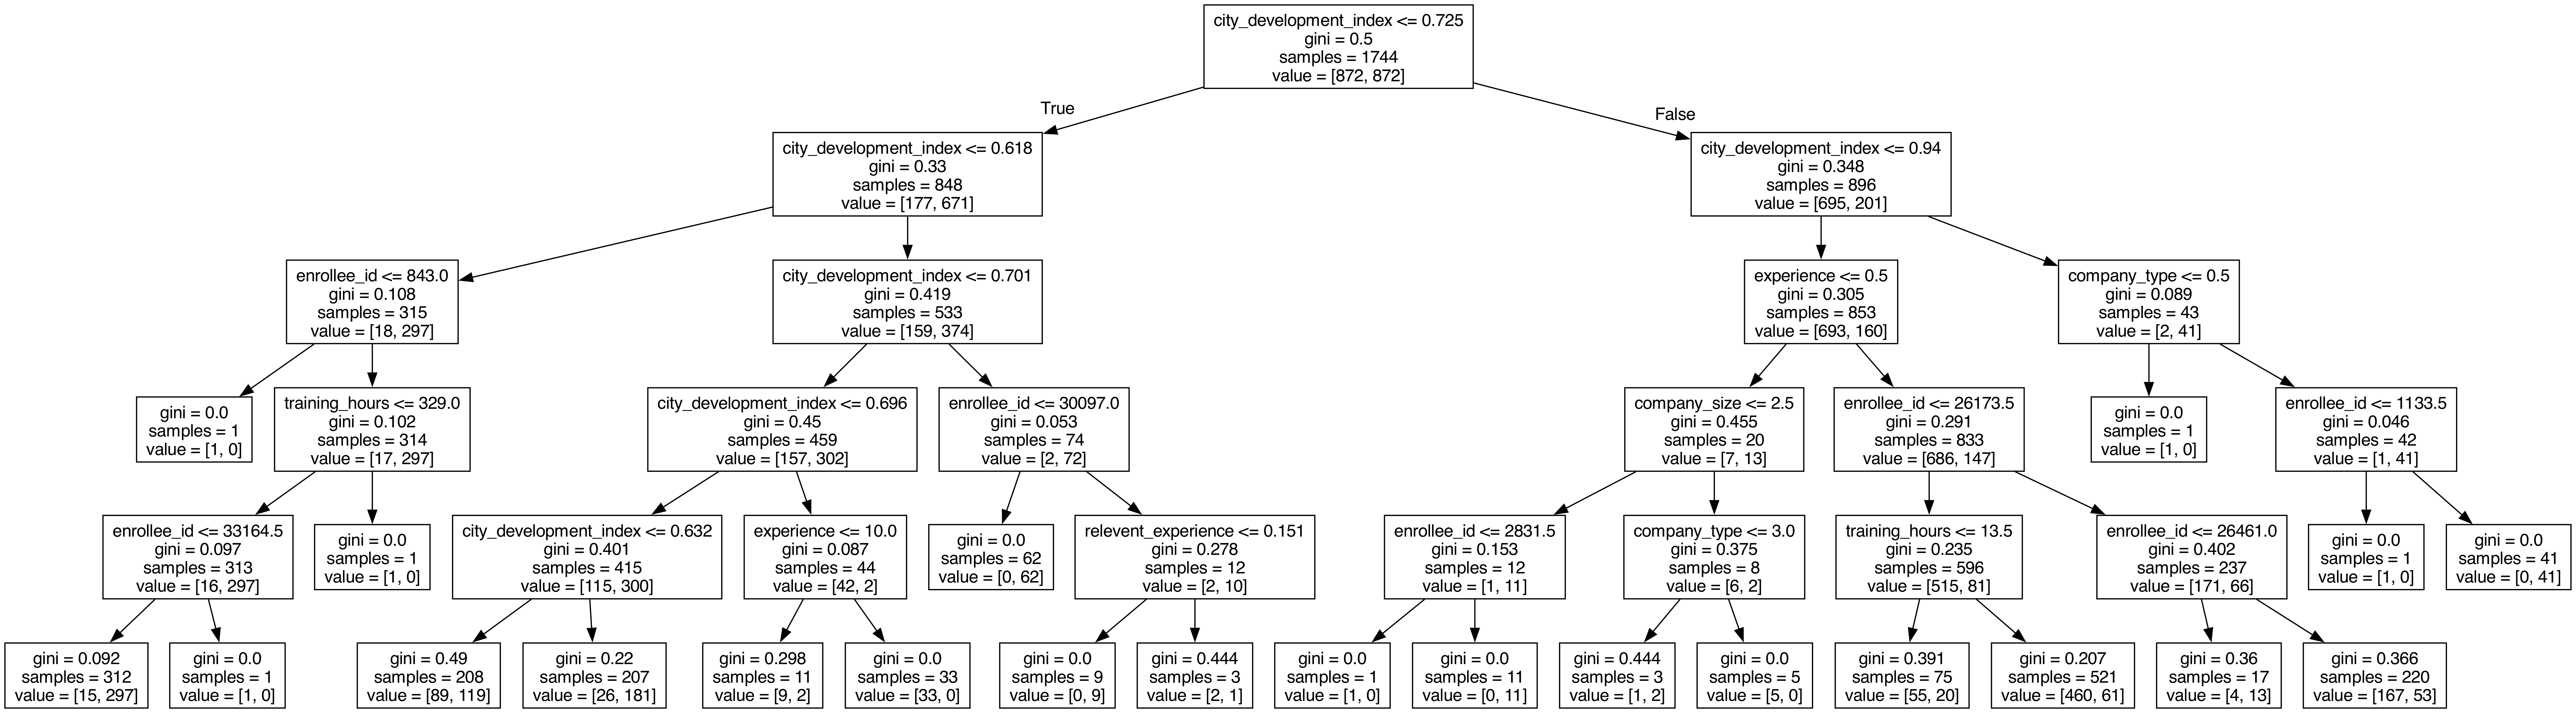

In [25]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

### Regression decision tree

In [26]:
# Initialize regression tree model
model_dt_reg = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
model_dt_reg.fit(X_train_oversampling, y_train_oversampling)     

DecisionTreeRegressor(max_depth=5, min_samples_split=8)

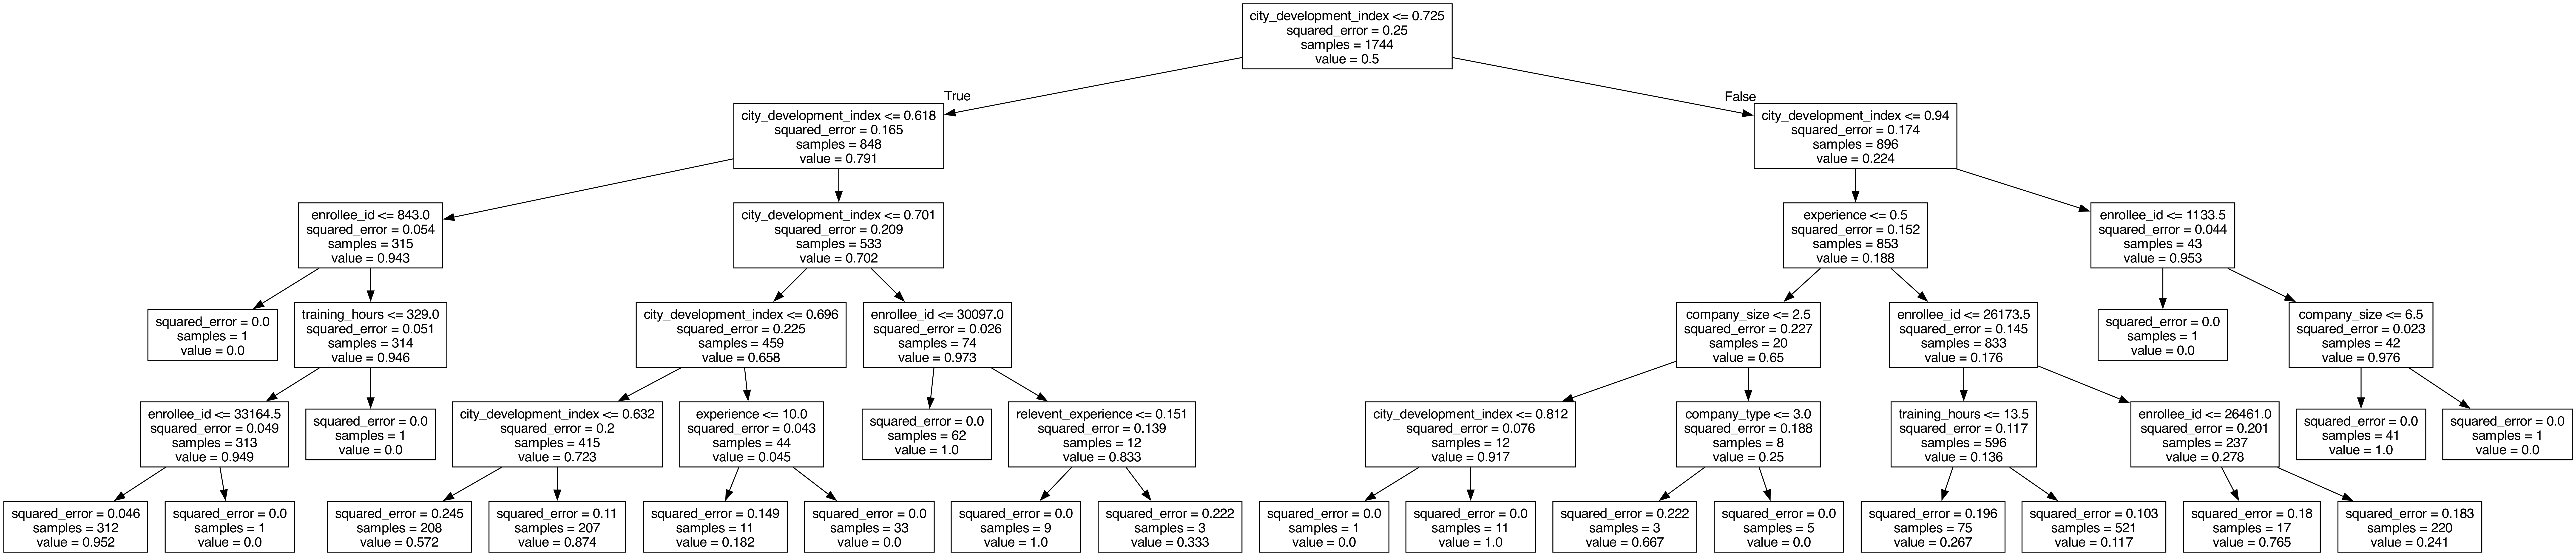

In [27]:
# Visualize the regression tree model
dot_data = tree.export_graphviz(decision_tree=model_dt_reg, out_file='regression-tree.dot', feature_names=feature_data.columns)     # Save model as 'regression-tree.dot'
call(['/opt/homebrew/bin/dot', '-Tpng', 'regression-tree.dot', '-o', 'regression-tree.png', '-Gdpi=300'])         # Convert the model to an image

Image(filename = 'regression-tree.png')     # Load and display file 'regression-tree.png'